# Charity Donations Classifier

### Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df.drop(["EIN"], axis=1, inplace=True)
application_df.head()

,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

### ATTEMPT: CHANGE CUTOFF LIMITS

In [6]:
# NAME counts
name_counts = application_df.NAME.value_counts()
name_counts

PARENT BOOSTER USA INC                                              1260
TOPS CLUB INC                                                        765
UNITED STATES BOWLING CONGRESS INC                                   700
WASHINGTON STATE UNIVERSITY                                          492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                      408
                                                                    ... 
NAIA TR FOR THE PROTECTION OF ANIMALS ANIMAL OWNERS & ANIMAL ENT       1
IMHA WARRIORS INC                                                      1
ANIMALS AS NATURAL THERAPY                                             1
COLORADO STATE TAEKWONDO ASSOCIATION INC                               1
HOME SWEET HOME COMMUNITY REDEVELOPMENT CO                             1
Name: NAME, Length: 19568, dtype: int64

In [8]:
name_counts.describe()

count    19568.000000
mean         1.752811
std         14.786174
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max       1260.000000
Name: NAME, dtype: float64

<AxesSubplot:ylabel='Density'>

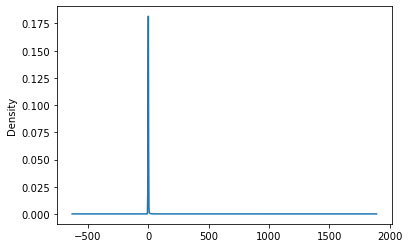

In [7]:
# Visualize the value counts of APPLICATION_TYPE
name_counts.plot.density()

In [9]:
len(list(name_counts[name_counts <= 5].index))

19214

In [11]:
# Determine which values to replace if counts are less than ...?
replace_name = list(name_counts[name_counts <= 5].index)

# Replace in dataframe
for name in replace_name:
    application_df.NAME = application_df.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.NAME.value_counts()

Other                                                 20043
PARENT BOOSTER USA INC                                 1260
TOPS CLUB INC                                           765
UNITED STATES BOWLING CONGRESS INC                      700
WASHINGTON STATE UNIVERSITY                             492
                                                      ...  
PUBLIC RELATIONS COUNCIL OF ALABAMA                       6
BETA BETA BETA BIOLOGICAL SOCIETY                         6
PARENTS OF MURDERED CHILDREN                              6
DAUGHTERS OF CHARITY HEALTH SYSTEM                        6
FAMILY CAREER AND COMMUNITY LEADERS OF AMERICA INC        6
Name: NAME, Length: 355, dtype: int64

In [12]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [13]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 700].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1370        1
C4500        1
C1283        1
C6100        1
C3700        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [15]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

### One Hot Encoder

In [16]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,NAME_ALPHA PHI OMEGA,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Create the Training/Testing Sets

In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 4
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 1592      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 1,623
Trainable params: 1,623
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [23]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5000) # every 5 seconds

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5698 - accuracy: 0.7385
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4799 - accuracy: 0.7854
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4613 - accuracy: 0.7896
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4538 - accuracy: 0.7896
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4501 - accuracy: 0.7902
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4473 - accuracy: 0.7905
Epoch 7/50
173/804 [=====>........................] - ETA: 1s - loss: 0.4396 - accuracy: 0.7950
Epoch 00007: saving model to checkpoints\weights.07.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.4452 - accuracy: 0.7906
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.4443 - accuracy: 0.7909
Epoch 9/50
804/804 [==============================] - 2s 2

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4553 - accuracy: 0.7876
Loss: 0.45530369877815247, Accuracy: 0.7876384854316711


<AxesSubplot:>

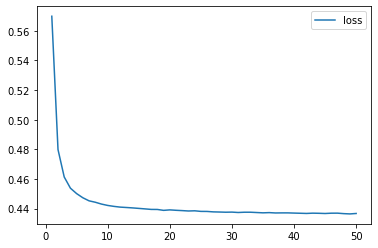

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

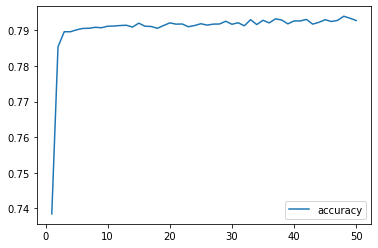

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")

### Attempt 2: Add Hidden Layer

In [28]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 6
hidden_nodes_layer2 = 5
hidden_nodes_layer3 = 4

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 2388      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 35        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 2,452
Trainable params: 2,452
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints2/",exist_ok=True)
checkpoint_path = "checkpoints2/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5000) # every 5 seconds

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20,callbacks=[cp_callback])

Epoch 1/20
804/804 [==============================] - 3s 2ms/step - loss: 0.5946 - accuracy: 0.7288
Epoch 2/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4920 - accuracy: 0.7728: 1s - loss: - ETA: 0s
Epoch 3/20
804/804 [==============================] - 2s 3ms/step - loss: 0.4699 - accuracy: 0.7837
Epoch 4/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4625 - accuracy: 0.7856
Epoch 5/20
804/804 [==============================] - 2s 2ms/step - loss: 0.4593 - accuracy: 0.7861
Epoch 6/20
804/804 [==============================] - 2s 3ms/step - loss: 0.4570 - accuracy: 0.7867
Epoch 7/20
161/804 [=====>........................] - ETA: 1s - loss: 0.4503 - accuracy: 0.7884
Epoch 00007: saving model to checkpoints2\weights.07.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4557 - accuracy: 0.7876
Epoch 8/20
804/804 [==============================] - 3s 3ms/step - loss: 0.4543 - accuracy: 0.7876: 0s - loss: 0.4551 - ac
Epoch 9/20


In [31]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4662 - accuracy: 0.7799
Loss: 0.46621179580688477, Accuracy: 0.7799416780471802


### Attempt 3 - more nodes, different activation

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 100)               39800     
_________________________________________________________________
dense_12 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 43,151
Trainable params: 43,151
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints3/",exist_ok=True)
checkpoint_path = "checkpoints3/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5000) # every 5 seconds

# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback], shuffle=True)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4970 - accuracy: 0.7662
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.4412 - accuracy: 0.7946
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4334 - accuracy: 0.7970
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4286 - accuracy: 0.7970
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4263 - accuracy: 0.7974
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4246 - accuracy: 0.7982
Epoch 7/100
164/804 [=====>........................] - ETA: 1s - loss: 0.4210 - accuracy: 0.7963
Epoch 00007: saving model to checkpoints3\weights.07.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.4226 - accuracy: 0.7995
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4211 - accuracy: 0.8005
Epoch 9/100
804/804 [============================

804/804 [==============================] - 2s 2ms/step - loss: 0.4006 - accuracy: 0.8093
Epoch 68/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4008 - accuracy: 0.8085
Epoch 69/100
307/804 [==========>...................] - ETA: 2s - loss: 0.4018 - accuracy: 0.8076 ETA: 2s - loss: 0.4039 - accura - ETA: 2s - loss: 0.4047 - ac
Epoch 00069: saving model to checkpoints3\weights.69.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.4008 - accuracy: 0.8088
Epoch 70/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4002 - accuracy: 0.8085
Epoch 71/100
804/804 [==============================] - 2s 3ms/step - loss: 0.4005 - accuracy: 0.8082
Epoch 72/100
804/804 [==============================] - 2s 3ms/step - loss: 0.3998 - accuracy: 0.8091
Epoch 73/100
804/804 [==============================] - 3s 3ms/step - loss: 0.4000 - accuracy: 0.8091: 0s - loss: 0.4000 - accuracy: 0.
Epoch 74/100
804/804 [==============================] - 2s 3

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.4624 - accuracy: 0.7882
Loss: 0.46237605810165405, Accuracy: 0.7882215976715088


<AxesSubplot:>

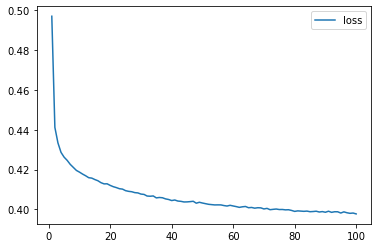

In [43]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

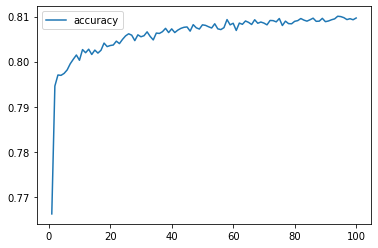

In [44]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [48]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimized.h5")

### Random Forest

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=42) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest model accuracy: 0.771
